In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
!pip list


Package    Version
---------- -------
pip        22.3
setuptools 65.5.0



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df = pd.read_csv("train.csv")

In [7]:
df.head

<bound method NDFrame.head of           Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          1       2596      51      3                               258   
1          2       2590      56      2                               212   
2          3       2804     139      9                               268   
3          4       2785     155     18                               242   
4          5       2595      45      2                               153   
...      ...        ...     ...    ...                               ...   
15115  15116       2607     243     23                               258   
15116  15117       2603     121     19                               633   
15117  15118       2492     134     25                               365   
15118  15119       2487     167     28                               218   
15119  15120       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distanc

In [17]:
df.info()
df.isnull().sum()
df['Cover_Type'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           15120 non-null  int64
 1   Aspect                              15120 non-null  int64
 2   Slope                               15120 non-null  int64
 3   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 4   Vertical_Distance_To_Hydrology      15120 non-null  int64
 5   Horizontal_Distance_To_Roadways     15120 non-null  int64
 6   Hillshade_9am                       15120 non-null  int64
 7   Hillshade_Noon                      15120 non-null  int64
 8   Hillshade_3pm                       15120 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 10  Wilderness_Area1                    15120 non-null  int64
 11  Wilderness_Area2                    15120 non-null  int64
 12  Wild

Cover_Type
5    2160
2    2160
1    2160
7    2160
3    2160
6    2160
4    2160
Name: count, dtype: int64

In [10]:
df = df.drop(columns=["Id"])

<Axes: >

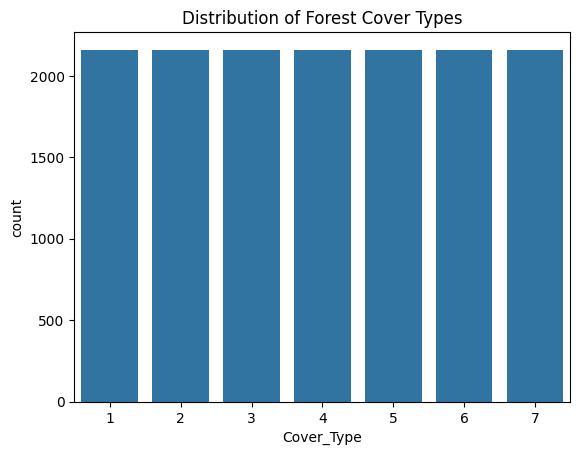

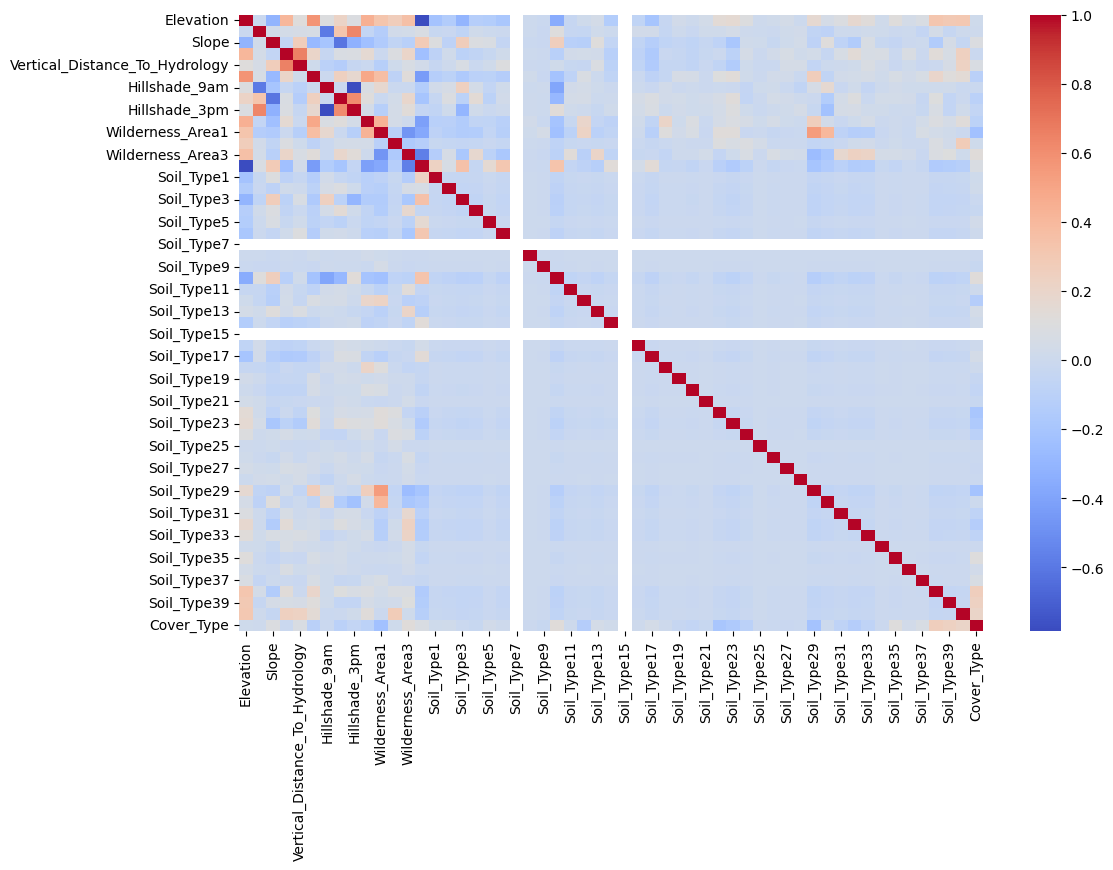

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(x='Cover_Type', data=df)
plt.title("Distribution of Forest Cover Types")


numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), annot=False, cmap='coolwarm')


In [11]:
X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8551587301587301
Classification Report:
               precision    recall  f1-score   support

           1       0.78      0.77      0.77       432
           2       0.78      0.65      0.71       432
           3       0.83      0.81      0.82       432
           4       0.93      0.97      0.95       432
           5       0.88      0.94      0.91       432
           6       0.83      0.88      0.85       432
           7       0.94      0.97      0.95       432

    accuracy                           0.86      3024
   macro avg       0.85      0.86      0.85      3024
weighted avg       0.85      0.86      0.85      3024



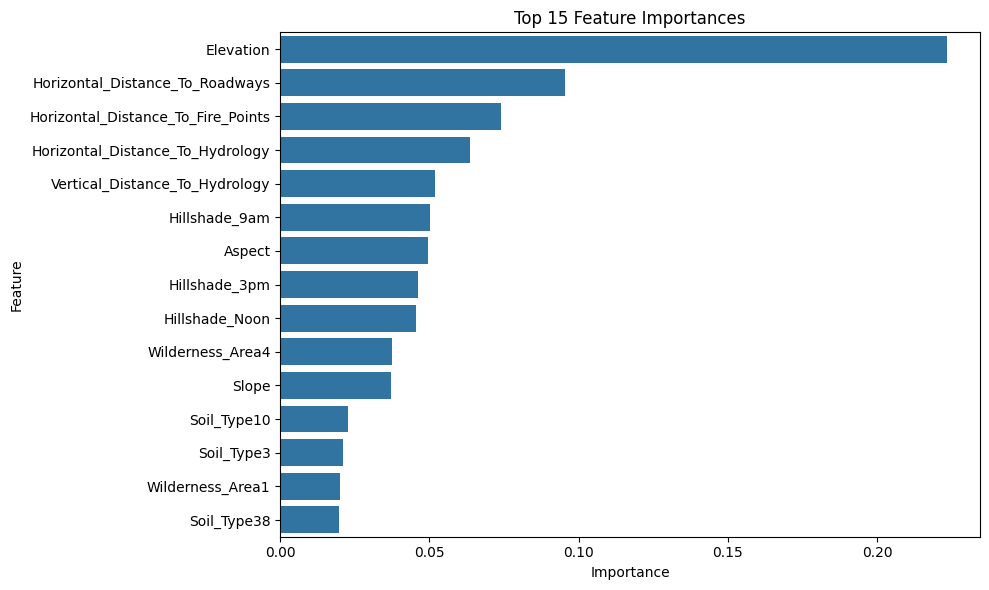

In [15]:
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.show()

In [16]:
import numpy as np


new_input = np.array([2596, 51, 3, 258, 0, 510, 221, 232, 148, 6279] + [0]*44).reshape(1, -1)

# Predict
predicted_cover_type = model.predict(new_input)
print("Predicted Forest Cover Type:", predicted_cover_type[0])


Predicted Forest Cover Type: 5


C:\Users\DEEP\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
